In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import butter, sosfilt, stft, welch
from scipy.optimize import curve_fit

In [2]:
def get_psd(data, channel=1):
    fs = int(np.ceil(1 / (data[0, 1] - data[0, 0])))
    nperseg = fs / 10
    
    ff, pp = welch(data[channel], fs=fs, nperseg=nperseg)
    return ff, pp

def peak_amplitude_stft(tod, fs, nperseg, driving_freq):
    
    ff, tt, Zxx = stft(tod, fs=fs, nperseg=nperseg)
    sig = np.abs(Zxx)
    # f = np.where(ff==driving_freq)[0][0]
    f = np.argmin(np.abs(ff - driving_freq))

    # time, peak amplitude^2, sample frequency, sftp
    return tt, sig[f], ff, Zxx[f]

In [3]:
def get_filtered_signal(data, f_hp, f_lp, order=8):
    fs = int(np.ceil(1 / (data[0, 1] - data[0, 0]))) * 1000 # Sampling rate in Hz
    
    sos_hp = butter(order, f_hp, 'hp', fs=fs, output='sos')
    sos_lp = butter(order, f_lp, 'lp', fs=fs, output='sos')
    
    filtered = sosfilt(sos_hp, data[1])
    filtered_filtered = sosfilt(sos_lp, filtered)
    
    return filtered_filtered

In [4]:
def plot_peak_amp(data, drive_freq):
    fs = int(np.ceil(1 / (data[0, 1] - data[0, 0])))
#     nperseg = fs / 10
    nperseg = fs

    tt, sig, ff, Zxx = peak_amplitude_stft(data[1], fs, nperseg, drive_freq)
    
    fig, ax = plt.subplots(figsize = (20, 6))
    ax.grid()
    ax.plot(tt, sig, '-')

    ax.set_xlabel('Time (s)', fontsize=18)
    ax.set_ylabel(f'Peak amplitude@{int(drive_freq/1000)} kHz (V)', fontsize=18)
    ax.set_title('1 mbar, driving field = 20 V peak to peak', fontsize=20)
    
    return fig, ax

## Determine the charge state of the nanosphere

In [5]:
data_file = r"D:\Experiment\Charging\20231103\uvcharging_50s_0.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

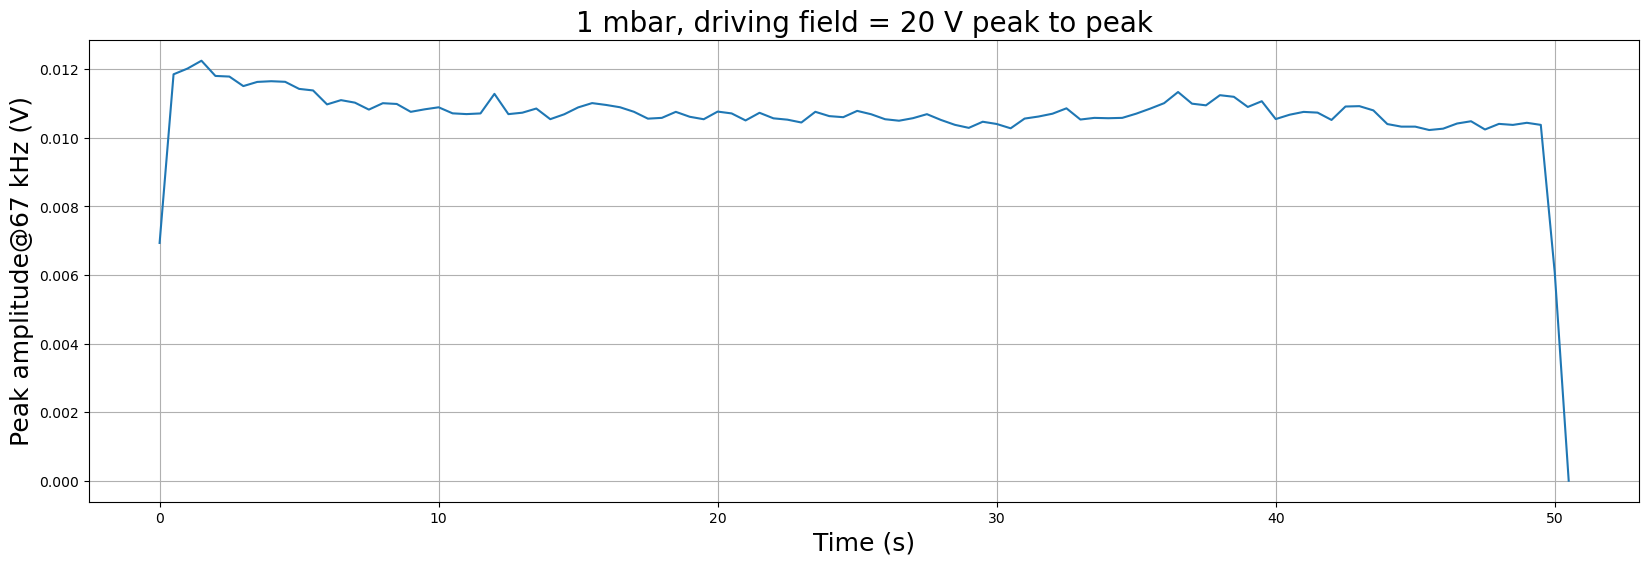

In [6]:
fig, ax = plot_peak_amp(data, 67000)

In [5]:
data_file = r"D:\Experiment\Charging\20231103\uvcharging_5s_1.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

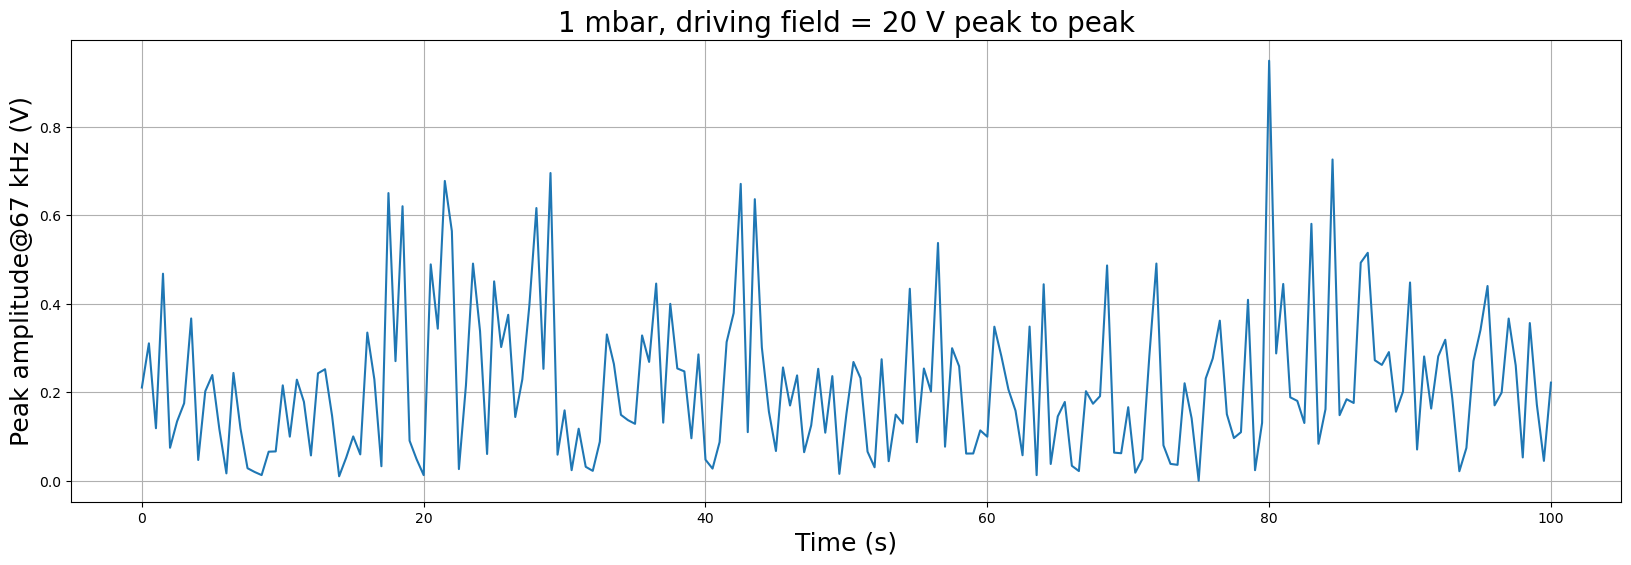

In [6]:
fig, ax = plot_peak_amp(data, 67000)

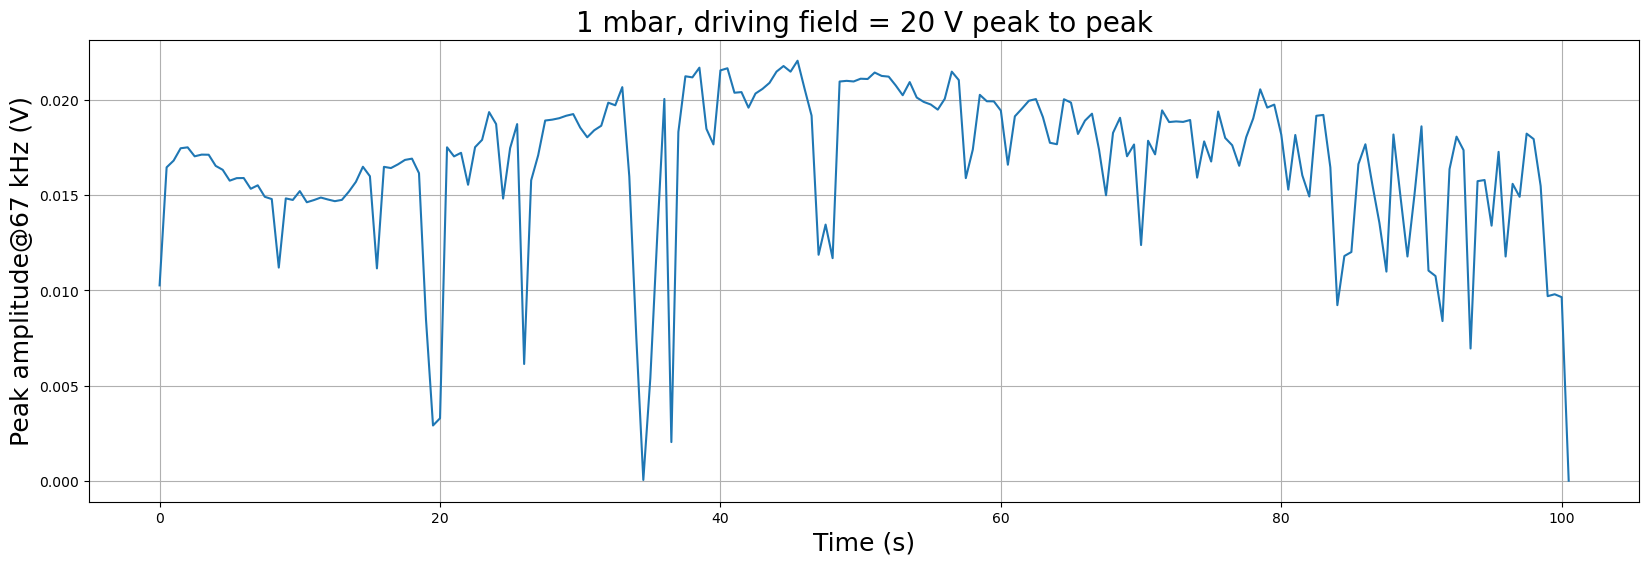

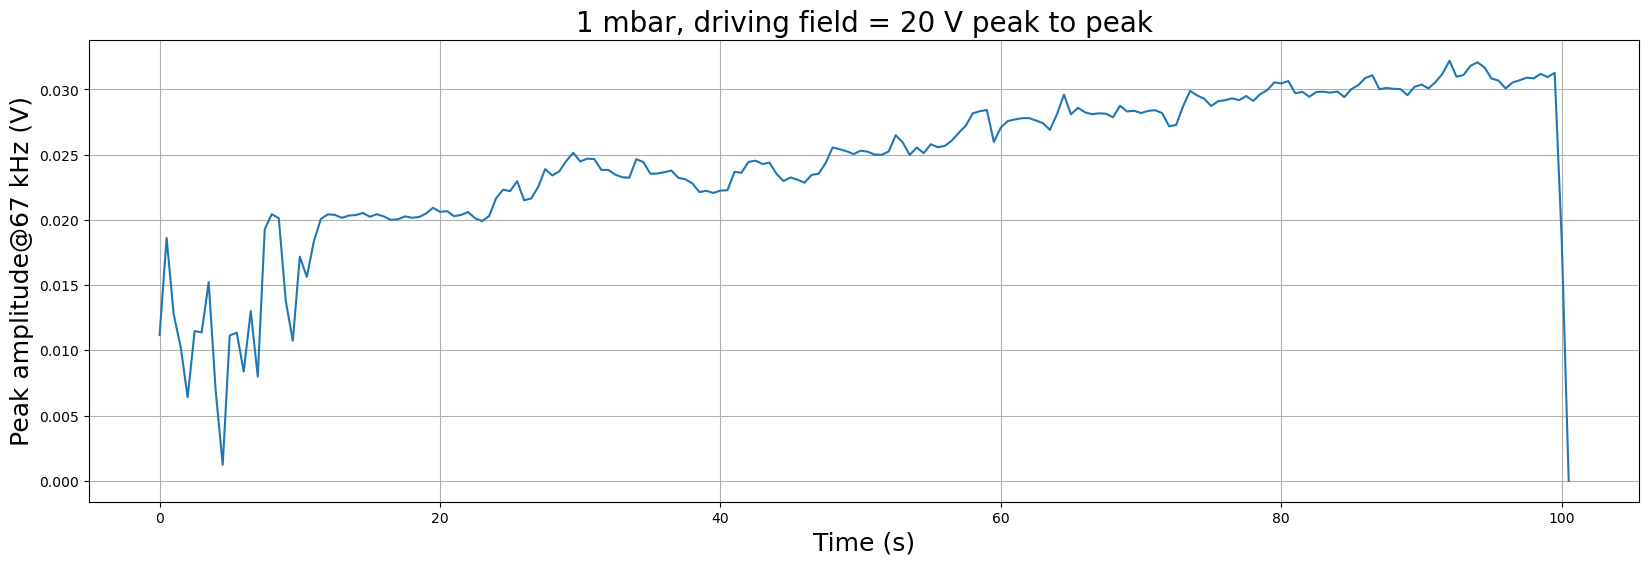

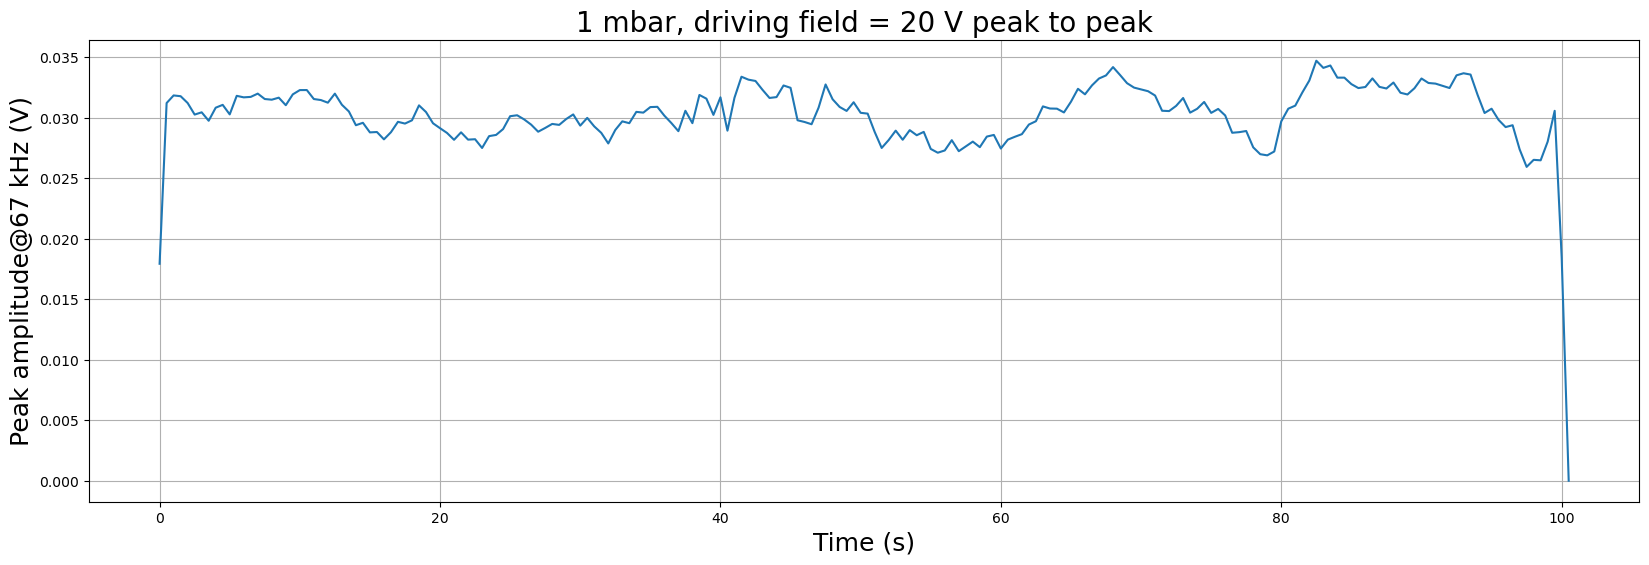

In [23]:
for i in [2, 3, 4]:
    data_file = fr"D:\Experiment\Charging\20231102\uvcharging_100s_{i}.csv"
    data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T
    fig, ax = plot_peak_amp(data, 67000)